In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# Деревья

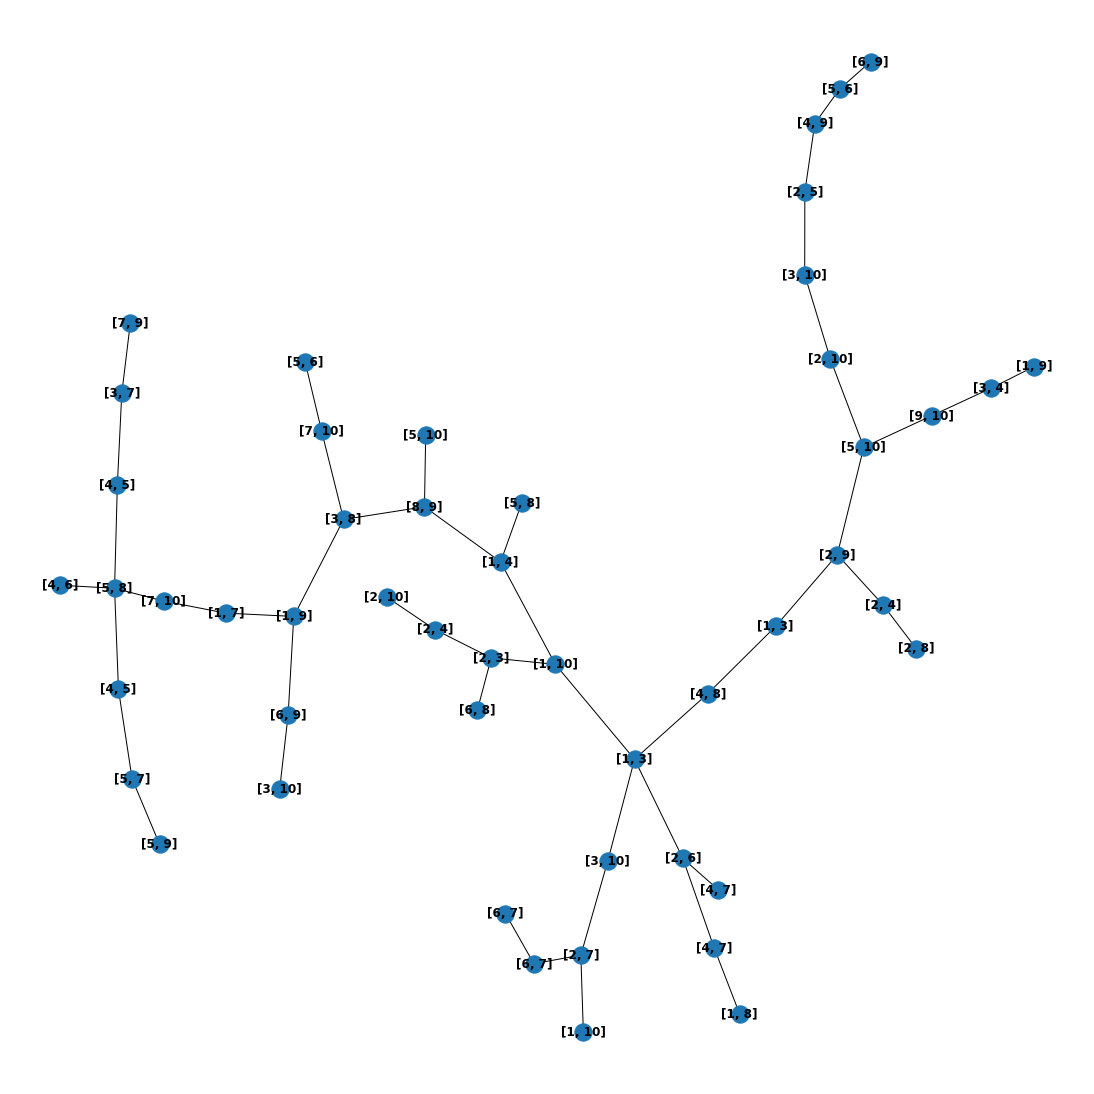

In [ ]:
G = nx.random_tree(50, seed = 23)

random.seed(6)
for i in range(50):
    now_w=10
    max_w=1
    while(now_w>=max_w):
        now_w = random.randint(1, 10)
        max_w = random.randint(1, 10)
    G.nodes[i]['loads'] = [now_w,max_w]

values = []
for i in range(50):
    values.append(dict(G.nodes.data())[i]['loads'])
labels = dict(zip(list(dict(G.nodes.data()).keys()),values))

pos = nx.planar_layout(G)
plt.figure(figsize=(15,15)) 
nx.draw(G, with_labels=True,labels = labels, font_weight='bold')
plt.show()



## Критерий связности

![image.png](attachment:image.png)

In [ ]:
for key,value in dict(G.degree).items():
    if value == 1:
        print(key,value)

4 1
7 1
9 1
10 1
15 1
16 1
20 1
21 1
25 1
30 1
34 1
35 1
38 1
41 1
43 1
44 1


In [ ]:
def krit_svyaz_tree(k,labels):
    print(f'k = {k} \n')
    
    nodes_for_delete = []
    for i in range(k):
        start_node = int(random.choice(set(list(G.nodes)) - set(nodes_for_delete)))
        labels[start_node][0] = random.randint(labels[start_node][1],20)
        nodes_for_delete.append(start_node)
    
        

In [ ]:
a= [1,2,3,4,5]
b = [1,2]
#a - b

TypeError: unsupported operand type(s) for -: 'list' and 'list'

Выбираем начальную вершину для эксперимента: 36 

Текущая и максимальная загрузка [1, 10] 



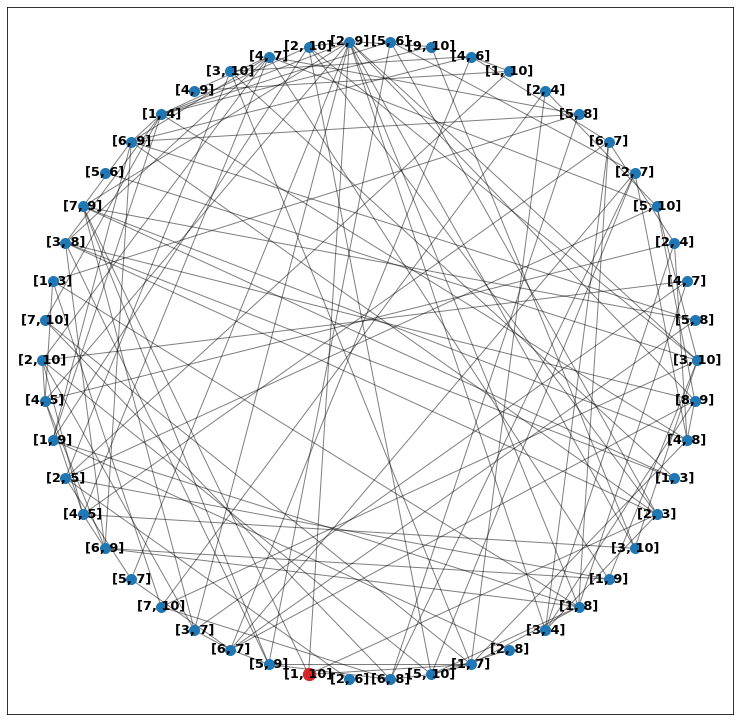

Новая текущая загрузка: 11 

Список вершин, на которую надо добавить нагрузку: [13, 21, 40, 46]


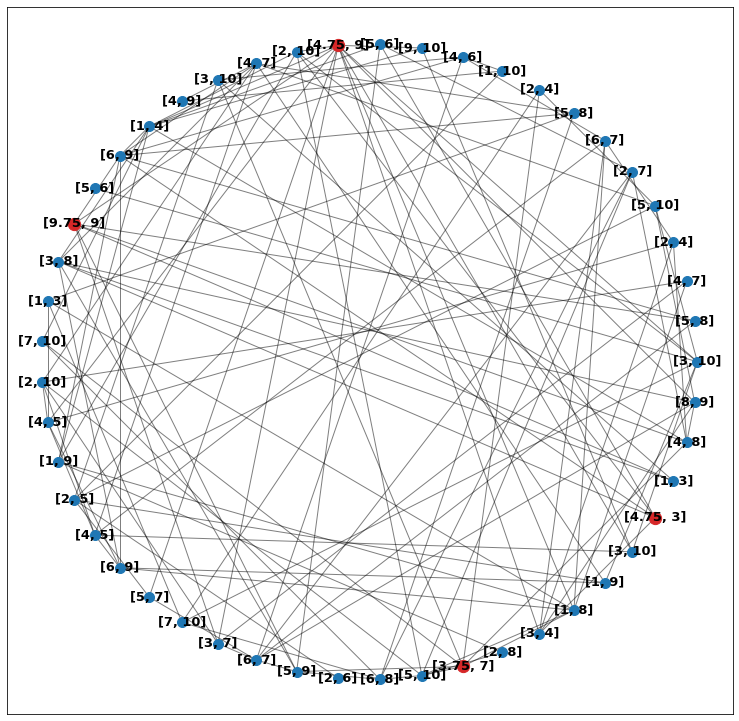

In [ ]:
random.seed(6)
#выбираем начальную вершину для эксперимента
start_node = int(random.choice(list(G.nodes)))
print(f'Выбираем начальную вершину для эксперимента: {start_node} \n')
print(f'Текущая и максимальная загрузка {labels[start_node]} \n')
draw_graph([start_node], 'red', 'blue')
    
#делаем текующую загрузку больше максимальной
labels[start_node][0] = random.randint(labels[start_node][1],20)
print(f'Новая текущая загрузка: {labels[start_node][0]} \n')
    
vertexes_to_add_additional_load_to = added_loads(start_node) #список вершин, на которые добавилась нагрузка

Итерация №1
Список вершин, на которую надо добавить нагрузку: [1, 13, 19, 33, 35, 47, 48]


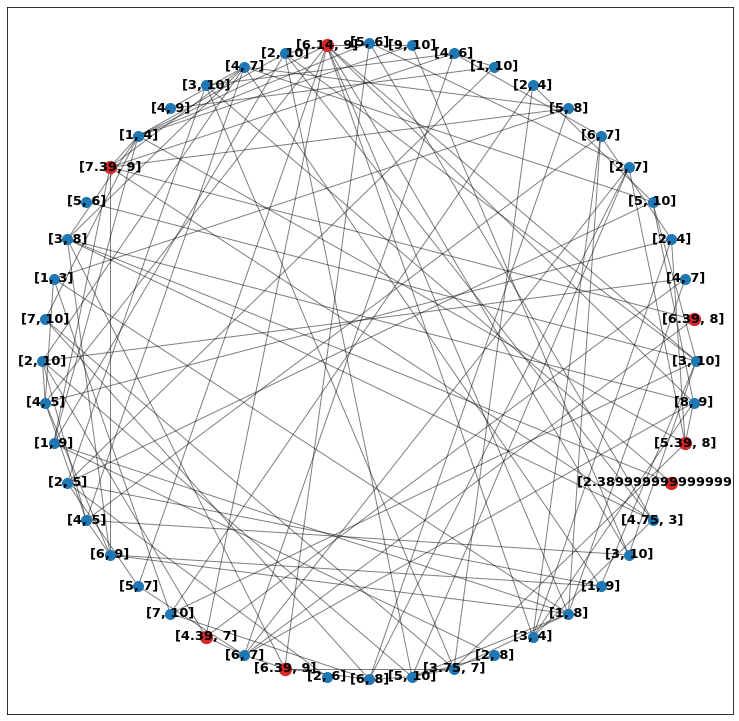

Список вершин, на которую надо добавить нагрузку: [12, 14, 19, 22, 42]


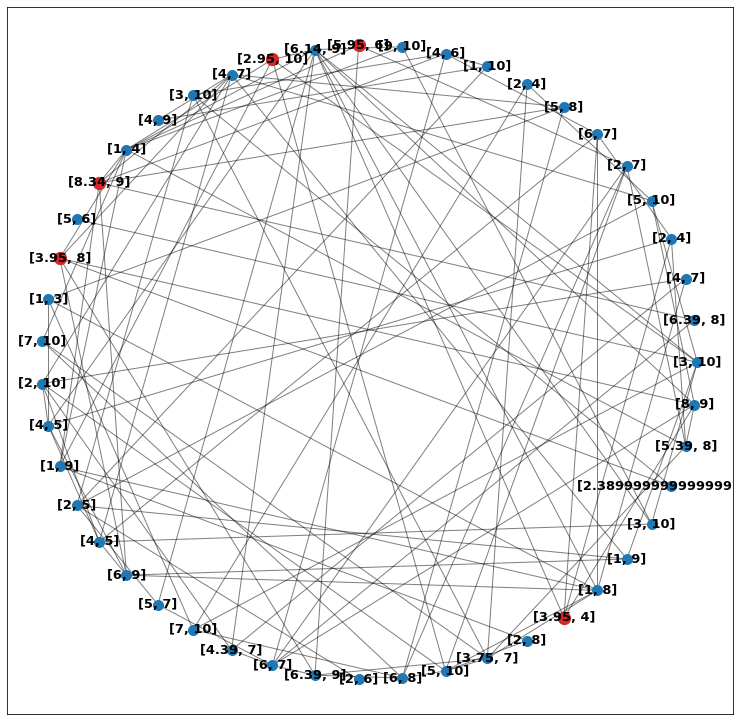

In [ ]:


print(f'Итерация №1')
new_overloaded_nodes = check_graph(vertexes_to_add_additional_load_to, labels)
for node in new_overloaded_nodes:
    added_loads(node)
        

In [ ]:
labels

{0: [3, 10],
 1: [5, 8],
 2: [4, 7],
 3: [2, 4],
 4: [5, 10],
 5: [2, 7],
 6: [6, 7],
 7: [5, 8],
 8: [2, 4],
 9: [1, 10],
 10: [4, 6],
 11: [9, 10],
 12: [5, 6],
 13: [4.75, 9],
 14: [2, 10],
 15: [4, 7],
 16: [3, 10],
 17: [4, 9],
 18: [1, 4],
 19: [6, 9],
 20: [5, 6],
 21: [9.75, 9],
 22: [3, 8],
 23: [1, 3],
 24: [7, 10],
 25: [2, 10],
 26: [4, 5],
 27: [1, 9],
 28: [2, 5],
 29: [4, 5],
 30: [6, 9],
 31: [5, 7],
 32: [7, 10],
 33: [3, 7],
 34: [6, 7],
 35: [5, 9],
 37: [2, 6],
 38: [6, 8],
 39: [5, 10],
 40: [3.75, 7],
 41: [2, 8],
 42: [3, 4],
 43: [1, 8],
 44: [1, 9],
 45: [3, 10],
 46: [4.75, 3],
 47: [1, 3],
 48: [4, 8],
 49: [8, 9]}

In [ ]:
def added_loads(overloaded_node):  
    #разбиваем загрузку на другие вершины
    additional_load = round(labels[overloaded_node][0]/len(G.edges(overloaded_node)),2)
    
    #список вершин на которую надо добавить нагрузку
    vertexes_to_add_additional_load_to = []
    for vertex in range(len(list(G.edges(overloaded_node)))):
        vertexes_to_add_additional_load_to.append(list(G.edges(overloaded_node))[vertex][1])
    print(f'Список вершин, на которую надо добавить нагрузку: {vertexes_to_add_additional_load_to}')
    
    #добавляем текущую нагрузку
    for vertex in vertexes_to_add_additional_load_to:
        labels[vertex][0] = labels[vertex][0] + additional_load
        
    #удаляем вершину
    G.remove_node(overloaded_node)
    labels.pop(overloaded_node,'not found')
    
    #рисуем новый график
    draw_graph(vertexes_to_add_additional_load_to, 'red', 'blue')
    return vertexes_to_add_additional_load_to
    

In [ ]:
def draw_graph(nodelist,color_highlighted,color_basic):
    pos = nx.circular_layout(G)
    plt.figure(figsize=(13,13)) 

    nx.draw_networkx_nodes(
        G, pos, node_size=100, nodelist=set(G.nodes)-set(nodelist), node_color=f"tab:{color_basic}"
    )
    nx.draw_networkx_nodes(
        G, pos, node_size=150, nodelist=nodelist, node_color=f"tab:{color_highlighted}"
    )
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
    nx.draw_networkx_labels(G, pos, labels, font_size=13,font_weight='bold')
    plt.show()

In [ ]:
def check_graph(nodes_with_added_load,labels):
    new_list_nodes_for_add_load = []

    for node in nodes_with_added_load:
        if labels[node][0] >= labels[node][1]:
            new_list_nodes_for_add_load.append(node)
    return new_list_nodes_for_add_load

Выбираем начальную вершину для эксперимента: 36 

Текущая и максимальная загрузка [1, 10] 



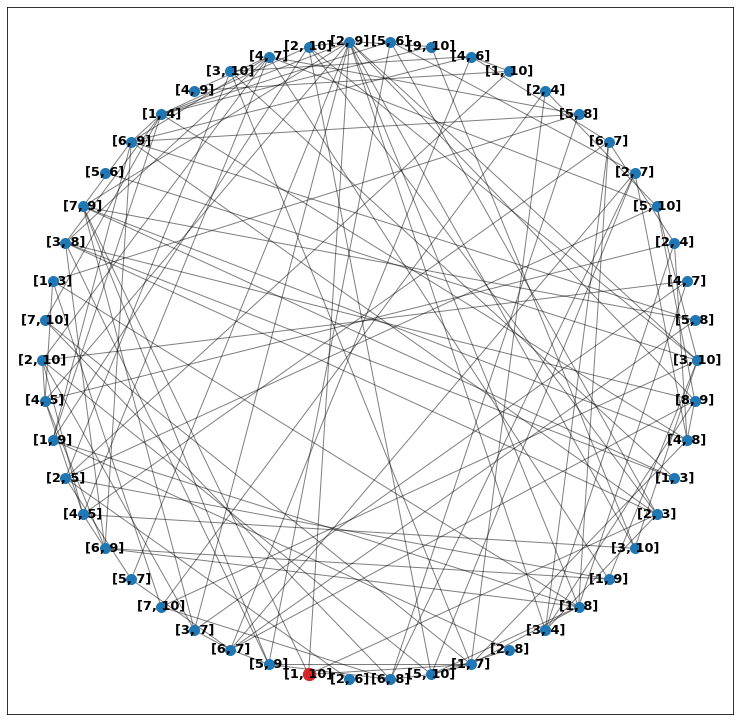

Новая текущая загрузка: 11 

Список вершин, на которую надо добавить нагрузку: [13, 21, 40, 46]


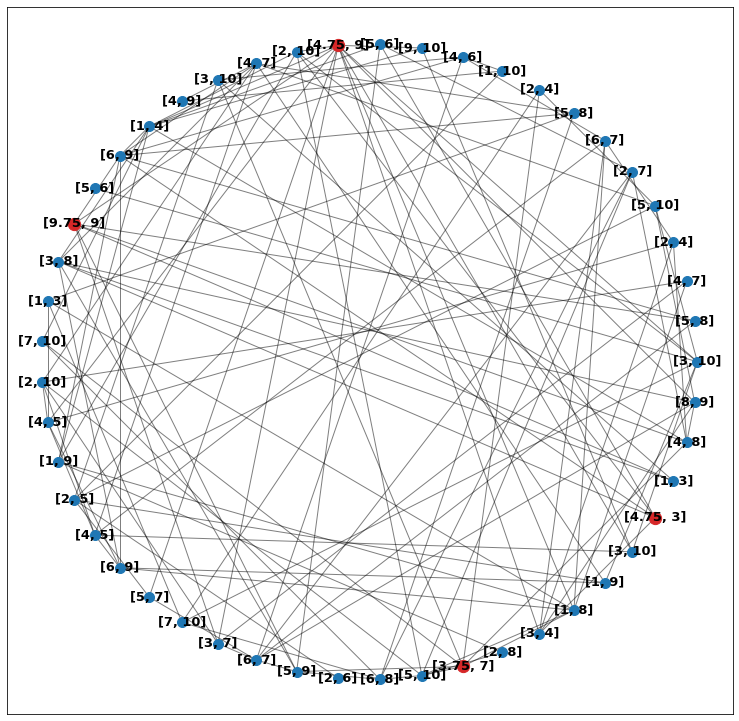

In [ ]:
added_loads()


In [ ]:
labels

{0: [3, 10],
 1: [5, 8],
 2: [4, 7],
 3: [2, 4],
 4: [5, 10],
 5: [2, 7],
 6: [6, 7],
 7: [5, 8],
 8: [2, 4],
 9: [1, 10],
 10: [4, 6],
 11: [9, 10],
 12: [5, 6],
 13: [2, 9],
 14: [2, 10],
 15: [4, 7],
 16: [3, 10],
 17: [4, 9],
 18: [1, 4],
 19: [6, 9],
 20: [5, 6],
 21: [7, 9],
 22: [3, 8],
 23: [1, 3],
 24: [7, 10],
 25: [2, 10],
 26: [4, 5],
 27: [1, 9],
 28: [2, 5],
 29: [4, 5],
 30: [6, 9],
 31: [5, 7],
 32: [7, 10],
 33: [3, 7],
 34: [6, 7],
 35: [5, 9],
 36: [11, 10],
 37: [2, 6],
 38: [6, 8],
 39: [5, 10],
 40: [1, 7],
 41: [2, 8],
 42: [3, 4],
 43: [1, 8],
 44: [1, 9],
 45: [3, 10],
 46: [2, 3],
 47: [1, 3],
 48: [4, 8],
 49: [8, 9]}

In [ ]:
random.seed(6)
for i in range(50):
    now_w=10
    max_w=1
    while(now_w>=max_w):
        now_w = random.randint(1, 10)
        max_w = random.randint(1, 10)
    G.nodes[i]['loads'] = (now_w,max_w)

values = []
for i in range(50):
    values.append(dict(G.nodes.data())[i]['loads'])
labels = dict(zip(list(dict(G.nodes.data()).keys()),values))

In [ ]:
dict(G.nodes.data()).keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
dict(G.nodes.data())

{0: {'loads': (3, 10)},
 1: {'loads': (5, 8)},
 2: {'loads': (4, 7)},
 3: {'loads': (2, 4)},
 4: {'loads': (5, 10)},
 5: {'loads': (2, 7)},
 6: {'loads': (6, 7)},
 7: {'loads': (5, 8)},
 8: {'loads': (2, 4)},
 9: {'loads': (1, 10)},
 10: {'loads': (4, 6)},
 11: {'loads': (9, 10)},
 12: {'loads': (5, 6)},
 13: {'loads': (2, 9)},
 14: {'loads': (2, 10)},
 15: {'loads': (4, 7)},
 16: {'loads': (3, 10)},
 17: {'loads': (4, 9)},
 18: {'loads': (1, 4)},
 19: {'loads': (6, 9)},
 20: {'loads': (5, 6)},
 21: {'loads': (7, 9)},
 22: {'loads': (3, 8)},
 23: {'loads': (1, 3)},
 24: {'loads': (7, 10)},
 25: {'loads': (2, 10)},
 26: {'loads': (4, 5)},
 27: {'loads': (1, 9)},
 28: {'loads': (2, 5)},
 29: {'loads': (4, 5)},
 30: {'loads': (6, 9)},
 31: {'loads': (5, 7)},
 32: {'loads': (7, 10)},
 33: {'loads': (3, 7)},
 34: {'loads': (6, 7)},
 35: {'loads': (5, 9)},
 36: {'loads': (1, 10)},
 37: {'loads': (2, 6)},
 38: {'loads': (6, 8)},
 39: {'loads': (5, 10)},
 40: {'loads': (1, 7)},
 41: {'loads': 